In [3]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [4]:
# read in the dataset
df = pd.read_csv('./data/diabetes_data_upload.csv')

In [5]:
# check dataset
df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [8]:
df.loc[df['Itching'] == 'Yes', ['Gender', 'Age']]

,Gender,Age
0,Male,40
2,Male,41
3,Male,45
4,Male,60
5,Male,55
...,...,...
510,Male,67
511,Male,66
515,Female,39
516,Female,48


In [6]:
dict(df.dtypes)

{'Age': dtype('int64'),
 'Gender': dtype('O'),
 'Polyuria': dtype('O'),
 'Polydipsia': dtype('O'),
 'sudden weight loss': dtype('O'),
 'weakness': dtype('O'),
 'Polyphagia': dtype('O'),
 'Genital thrush': dtype('O'),
 'visual blurring': dtype('O'),
 'Itching': dtype('O'),
 'Irritability': dtype('O'),
 'delayed healing': dtype('O'),
 'partial paresis': dtype('O'),
 'muscle stiffness': dtype('O'),
 'Alopecia': dtype('O'),
 'Obesity': dtype('O'),
 'class': dtype('O')}

In [9]:
from sklearn import preprocessing

In [22]:
possible_values = np.array(['low', 'medium', 'high'])
le1 = preprocessing.LabelEncoder()
le1.fit(possible_values)

LabelEncoder()

In [23]:
le1.classes_

array(['high', 'low', 'medium'], dtype='<U6')

In [26]:
values = np.array(['high', 'low', 'high', 'medium'])

In [27]:
values = le1.transform(values)
print(values)

[0 1 0 2]


In [19]:

le = preprocessing.LabelEncoder()
values = le.fit_transform(values)

In [11]:
values

array([0, 1, 0, 2])

In [12]:
def encode_numerically(df):
    encoders = {}
    is_encodable = dtype('O')
    dtypes = dict(df.dtypes)
    for k, v in dtypes.items():
        if v == is_encodable:
            encoders[k] = preprocessing.LabelEncoder()
            df[k] = encoders[k].fit_transform(df[k])
    return encoders

In [30]:
encoders = encode_numerically(df)

In [31]:
encoders

{'Gender': LabelEncoder(),
 'Polyuria': LabelEncoder(),
 'Polydipsia': LabelEncoder(),
 'sudden weight loss': LabelEncoder(),
 'weakness': LabelEncoder(),
 'Polyphagia': LabelEncoder(),
 'Genital thrush': LabelEncoder(),
 'visual blurring': LabelEncoder(),
 'Itching': LabelEncoder(),
 'Irritability': LabelEncoder(),
 'delayed healing': LabelEncoder(),
 'partial paresis': LabelEncoder(),
 'muscle stiffness': LabelEncoder(),
 'Alopecia': LabelEncoder(),
 'Obesity': LabelEncoder(),
 'class': LabelEncoder()}

In [32]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [33]:
data = df.values

In [35]:
X, y = data[:, :-1], data[:, -1]

In [38]:
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [39]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, shuffle=True)

In [40]:
clf = tree.DecisionTreeClassifier()

In [41]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

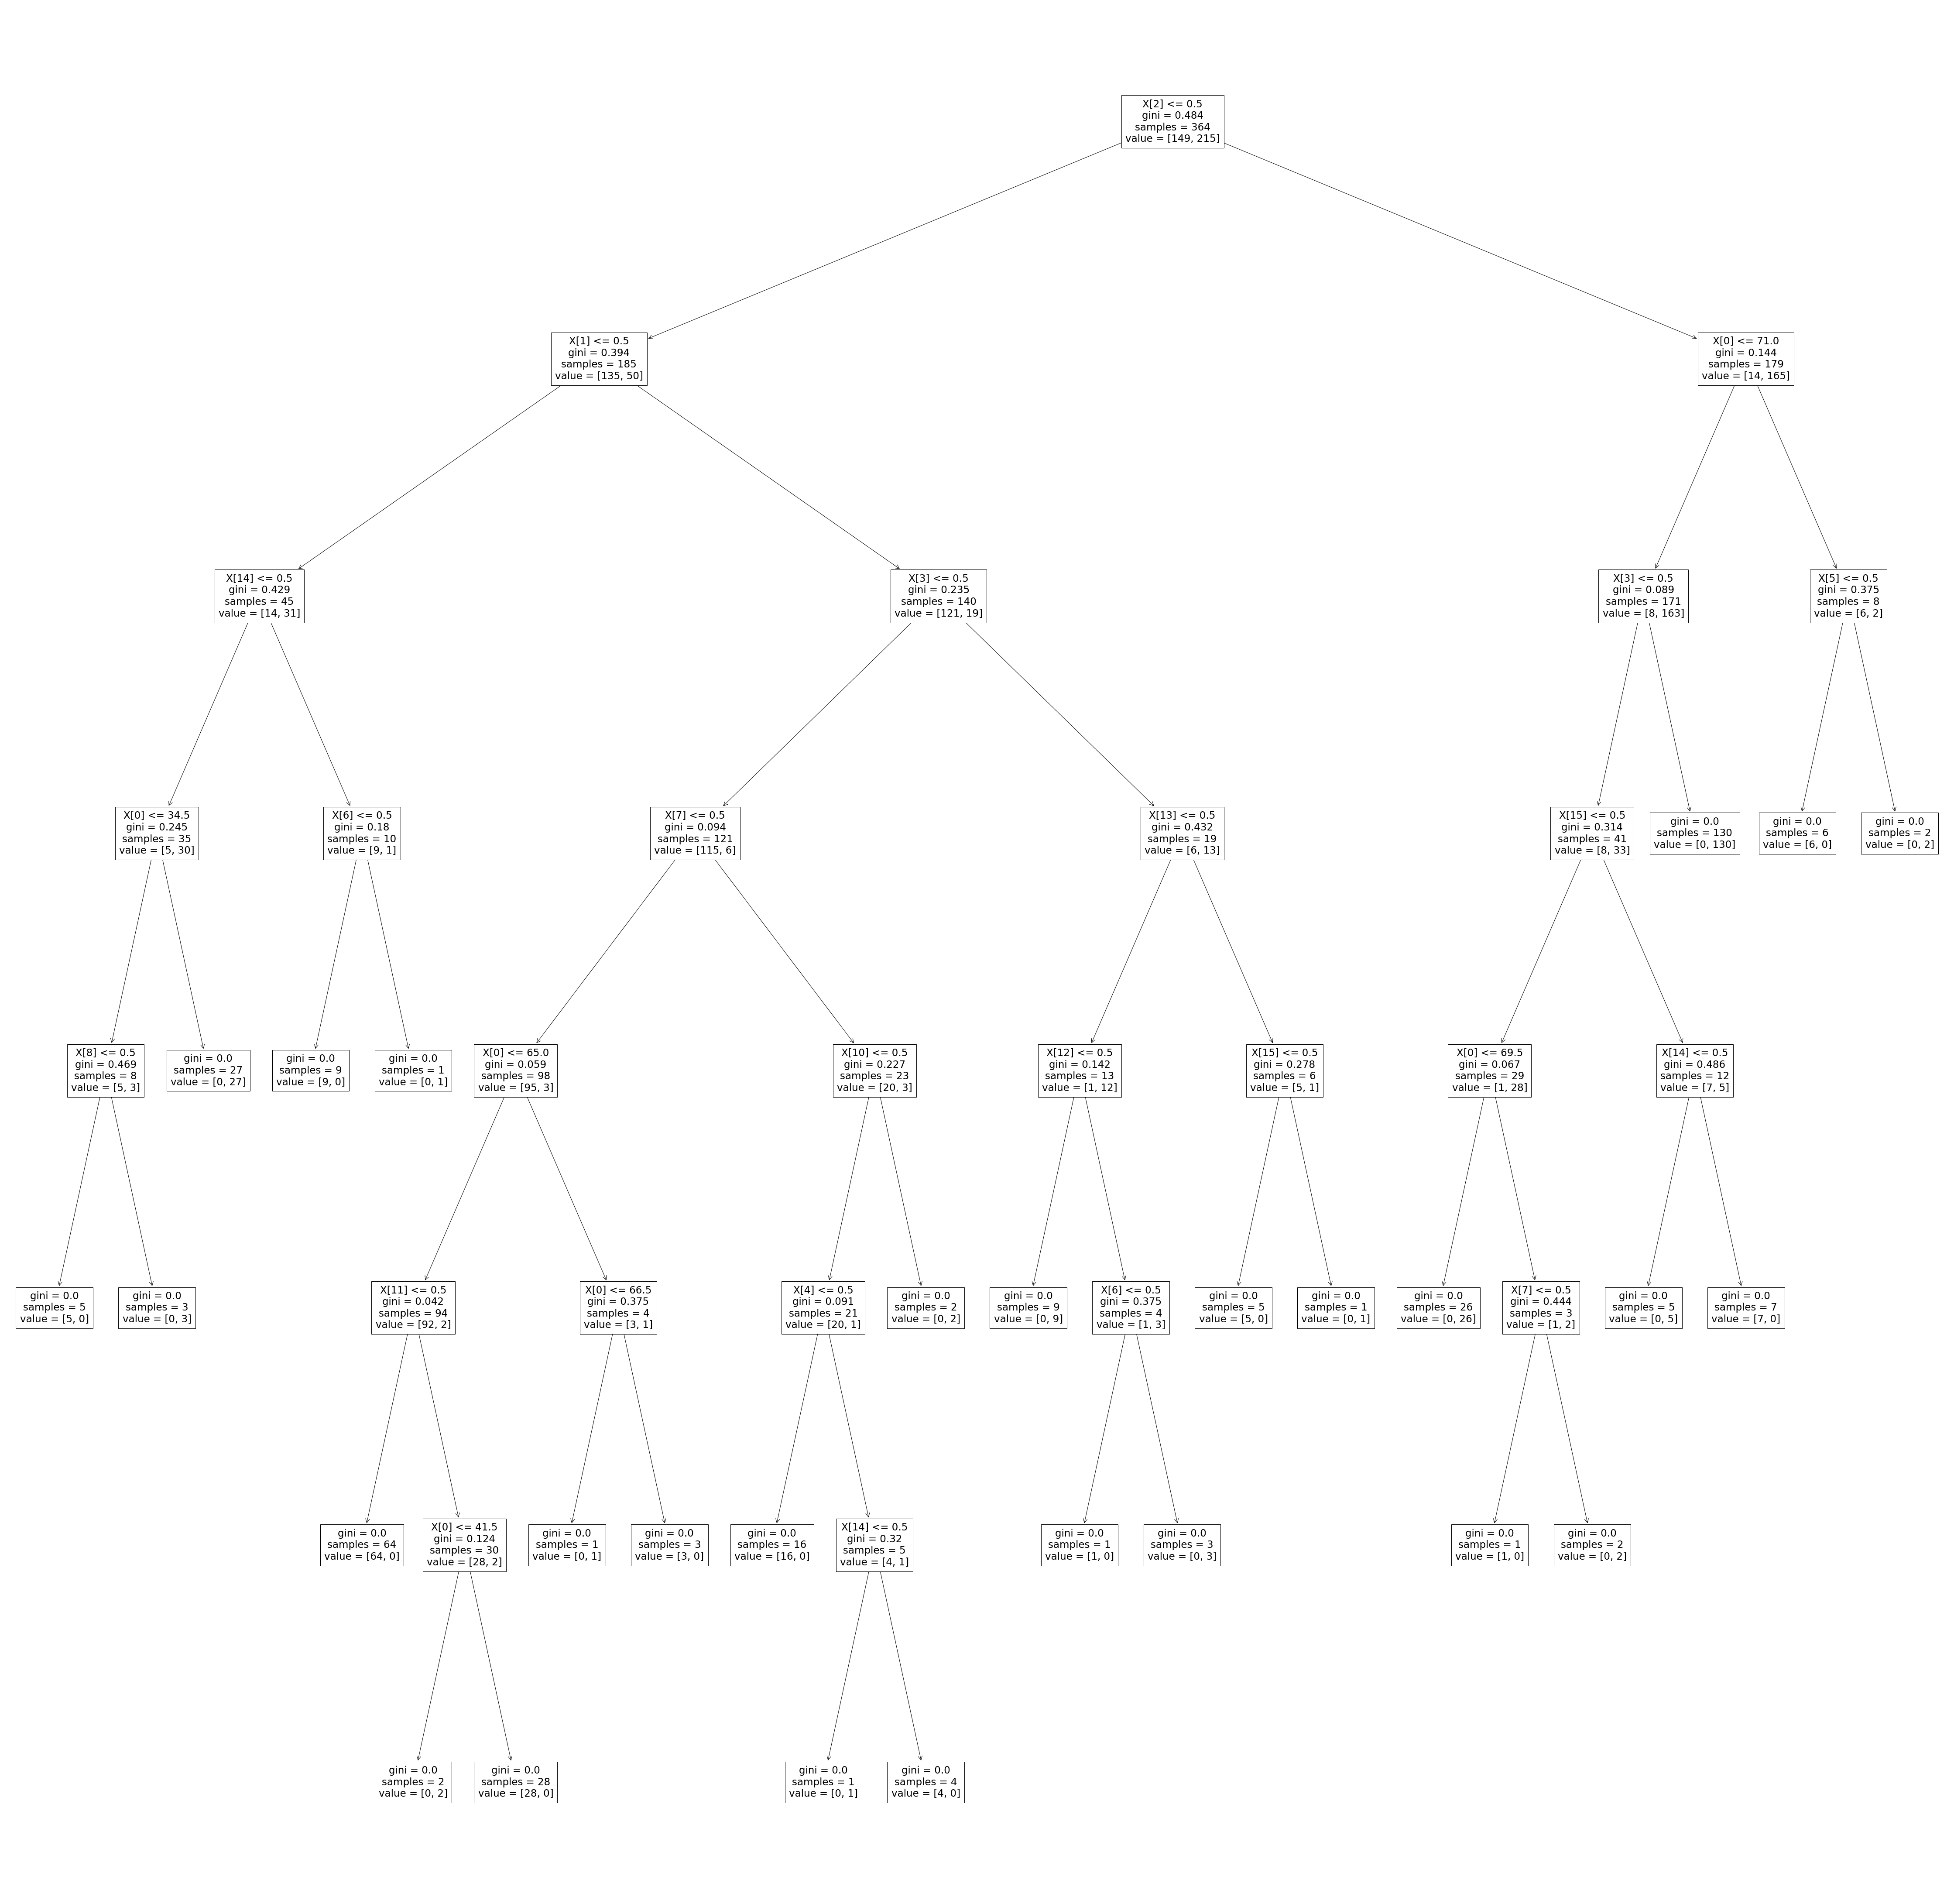

In [47]:
plt.figure(figsize=(80,80))
p = tree.plot_tree(clf)

In [48]:
y_pred = clf.predict(X_test)

In [49]:
metrics.confusion_matrix(y_test, y_pred)

array([[48,  3],
       [ 8, 97]])

In [50]:
metrics.f1_score(y_test, y_pred)

0.9463414634146342

In [51]:
97/(97 + 8)

0.9238095238095239

In [52]:
97/(97 + 3)

0.97

In [60]:
kf = model_selection.KFold(5, shuffle=True)
kf.get_n_splits(X)

5

In [61]:
models = []
f1_scores = []
for train_index, test_index in kf.split(X):
    print(train_index)
    print(test_index)
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = metrics.f1_score(y_test, y_pred)
    f1_scores.append(score)
    models.append(clf)

[  0   1   2   3   4   6   8   9  10  12  14  15  16  17  18  19  20  21
  22  23  25  26  27  28  29  30  31  32  33  35  37  39  40  41  43  44
  45  47  48  49  50  51  52  54  55  56  57  58  59  62  63  64  65  66
  68  69  70  71  73  74  75  76  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  97  99 100 103 104 105 106 108 109 110
 111 112 113 114 115 116 117 119 121 122 123 125 126 128 129 130 131 132
 134 135 136 137 138 139 140 141 142 147 148 149 150 151 153 155 157 158
 159 160 161 162 163 165 166 167 168 169 170 171 172 173 175 177 178 179
 180 181 184 185 186 187 188 189 191 192 193 194 195 196 197 198 199 200
 201 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 224 226 227 228 229 230 231 232 233 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 254 255 256 257 258 259 260
 261 263 264 266 267 269 270 271 272 273 274 275 276 277 279 281 283 284
 285 287 288 289 292 293 294 295 296 297 299 300 30

In [58]:
np.mean(f1_scores)

0.9720482686076624

In [59]:
np.std(f1_scores)

0.013890792005452969

In [62]:
D = np.array([
    [0, 0, 1, 0, 1],
    [0, 1, 1, 1, 1],
    [0, 2, 0, 1, 0],
    [0, 2, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1],
    [1, 2, 0, 0, 1],
    [1, 1, 0, 1, 1],
    [2, 0, 1, 0, 1],
    [2, 1, 1, 0, 1],
    [2, 1, 0, 1, 1],
    [2, 0, 1, 1, 0],
    [2, 1, 0, 1, 0]
])

In [63]:
D[[0, 1, 4]]

array([[0, 0, 1, 0, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 0, 0, 0]])

In [68]:
D[0][2]

1

In [69]:
D[0, 2]

1

In [70]:
D[0]

array([0, 0, 1, 0, 1])

In [71]:
D[:, 2]

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0])

In [75]:
D[D[:, -1] == 1, 1]

array([0, 1, 0, 1, 2, 1, 0, 1, 1])